In [46]:
%%writefile DataSet.py
import random
import numpy as np
from PIL import Image
from os import listdir
from scipy.ndimage import imread

dspath = './V0/'

class DataSet:
    
    def __init__(self):    
        self.videos = np.empty([3*5, 40, 360, 640, 3], dtype=np.uint8)
        self.activity = []
        vidIndex = -1
        for directory in listdir(dspath): 
            if directory[0] != '.': #Each Activity
                for vid in range(5): #Each video
                    vidpath = dspath+directory+'/'+str(vid)+'/'
                    vidIndex += 1;
                    self.activity.append(directory)
                    for frame in range(40): #Each frame
                        framepath = vidpath+str(frame)+'rgb.png'
                        # print('[',vidIndex, frame, ']', directory)
                        print('Loading ', framepath)
                        self.videos[vidIndex, frame] = imread(framepath)[:,:,:3]
        random.seed(7)
        self.Indices = list(range(3*5))
        random.shuffle(self.Indices)
        self.size = len(self.Indices)
    
    def get_batch(self,batch_size=5):
        # Initialisation
        videos = np.zeros([batch_size, 40, 360, 640, 3], dtype=np.uint8)
        labels = []
        # Loading the batch
        for i in range(batch_size):
            if len(self.Indices): 
                ni = self.Indices.pop()
                videos[i,:,:,:,:] = self.videos[ni]
                labels.append(self.activity[ni])
        
        return videos,labels

Writing DataSet.py


In [28]:
ds = DataSet()

Loading  ./V0/hit/0/0rgb.png
Loading  ./V0/hit/0/1rgb.png
Loading  ./V0/hit/0/2rgb.png
Loading  ./V0/hit/0/3rgb.png
Loading  ./V0/hit/0/4rgb.png
Loading  ./V0/hit/0/5rgb.png
Loading  ./V0/hit/0/6rgb.png
Loading  ./V0/hit/0/7rgb.png
Loading  ./V0/hit/0/8rgb.png
Loading  ./V0/hit/0/9rgb.png
Loading  ./V0/hit/0/10rgb.png
Loading  ./V0/hit/0/11rgb.png
Loading  ./V0/hit/0/12rgb.png
Loading  ./V0/hit/0/13rgb.png
Loading  ./V0/hit/0/14rgb.png
Loading  ./V0/hit/0/15rgb.png
Loading  ./V0/hit/0/16rgb.png
Loading  ./V0/hit/0/17rgb.png
Loading  ./V0/hit/0/18rgb.png
Loading  ./V0/hit/0/19rgb.png
Loading  ./V0/hit/0/20rgb.png
Loading  ./V0/hit/0/21rgb.png
Loading  ./V0/hit/0/22rgb.png
Loading  ./V0/hit/0/23rgb.png
Loading  ./V0/hit/0/24rgb.png
Loading  ./V0/hit/0/25rgb.png
Loading  ./V0/hit/0/26rgb.png
Loading  ./V0/hit/0/27rgb.png
Loading  ./V0/hit/0/28rgb.png
Loading  ./V0/hit/0/29rgb.png
Loading  ./V0/hit/0/30rgb.png
Loading  ./V0/hit/0/31rgb.png
Loading  ./V0/hit/0/32rgb.png
Loading  ./V0/hit/0/

Loading  ./V0/push/2/1rgb.png
Loading  ./V0/push/2/2rgb.png
Loading  ./V0/push/2/3rgb.png
Loading  ./V0/push/2/4rgb.png
Loading  ./V0/push/2/5rgb.png
Loading  ./V0/push/2/6rgb.png
Loading  ./V0/push/2/7rgb.png
Loading  ./V0/push/2/8rgb.png
Loading  ./V0/push/2/9rgb.png
Loading  ./V0/push/2/10rgb.png
Loading  ./V0/push/2/11rgb.png
Loading  ./V0/push/2/12rgb.png
Loading  ./V0/push/2/13rgb.png
Loading  ./V0/push/2/14rgb.png
Loading  ./V0/push/2/15rgb.png
Loading  ./V0/push/2/16rgb.png
Loading  ./V0/push/2/17rgb.png
Loading  ./V0/push/2/18rgb.png
Loading  ./V0/push/2/19rgb.png
Loading  ./V0/push/2/20rgb.png
Loading  ./V0/push/2/21rgb.png
Loading  ./V0/push/2/22rgb.png
Loading  ./V0/push/2/23rgb.png
Loading  ./V0/push/2/24rgb.png
Loading  ./V0/push/2/25rgb.png
Loading  ./V0/push/2/26rgb.png
Loading  ./V0/push/2/27rgb.png
Loading  ./V0/push/2/28rgb.png
Loading  ./V0/push/2/29rgb.png
Loading  ./V0/push/2/30rgb.png
Loading  ./V0/push/2/31rgb.png
Loading  ./V0/push/2/32rgb.png
Loading  ./V0/pus

Loading  ./V0/reach/3/31rgb.png
Loading  ./V0/reach/3/32rgb.png
Loading  ./V0/reach/3/33rgb.png
Loading  ./V0/reach/3/34rgb.png
Loading  ./V0/reach/3/35rgb.png
Loading  ./V0/reach/3/36rgb.png
Loading  ./V0/reach/3/37rgb.png
Loading  ./V0/reach/3/38rgb.png
Loading  ./V0/reach/3/39rgb.png
Loading  ./V0/reach/4/0rgb.png
Loading  ./V0/reach/4/1rgb.png
Loading  ./V0/reach/4/2rgb.png
Loading  ./V0/reach/4/3rgb.png
Loading  ./V0/reach/4/4rgb.png
Loading  ./V0/reach/4/5rgb.png
Loading  ./V0/reach/4/6rgb.png
Loading  ./V0/reach/4/7rgb.png
Loading  ./V0/reach/4/8rgb.png
Loading  ./V0/reach/4/9rgb.png
Loading  ./V0/reach/4/10rgb.png
Loading  ./V0/reach/4/11rgb.png
Loading  ./V0/reach/4/12rgb.png
Loading  ./V0/reach/4/13rgb.png
Loading  ./V0/reach/4/14rgb.png
Loading  ./V0/reach/4/15rgb.png
Loading  ./V0/reach/4/16rgb.png
Loading  ./V0/reach/4/17rgb.png
Loading  ./V0/reach/4/18rgb.png
Loading  ./V0/reach/4/19rgb.png
Loading  ./V0/reach/4/20rgb.png
Loading  ./V0/reach/4/21rgb.png
Loading  ./V0/reac

In [42]:
vids, labels = ds.get_batch()

In [43]:
vids.shape

(5, 40, 360, 640, 3)

In [44]:
labels

[]

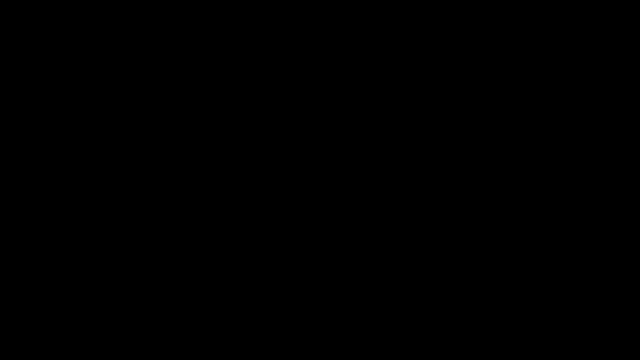

In [45]:
Image.fromarray(vids[4,25])